# 7: Random number generation


 #### [Back to main page](https://petrosyan.page/fall2020math3215)


### Sampling from the logistic function

The logistic function has the following form

$$F(X)=\frac{e^x}{1+e^x}\quad \Rightarrow \quad  f(x)=\frac{e^x}{(1+e^x)^2}.$$


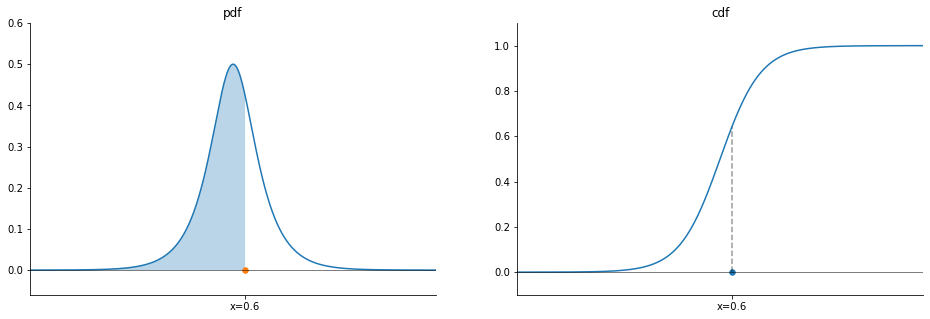

In [9]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
plt.rcParams['figure.figsize'] = (16, 5)


def logistic_cdf_pdf(x):
    xdata = np.linspace(-10, 10, 1000)
    def cdf_func(xdata):
        val = np.divide(np.exp(xdata), 1+np.exp(xdata))
        return val
    def pdf_func(xdata):
        val = np.divide(np.exp(xdata), (1+np.exp(xdata)**2))
        return val
    
    fig, [ax1, ax2] = plt.subplots(1, 2)
    
    ax1.plot(xdata, pdf_func(xdata))
    xshade = xdata[xdata<=x]
    ax1.fill_between(xshade, pdf_func(xshade), alpha=0.3)
    ax1.scatter(x,0, s=30)
    ax1.axhline(y=0, color='k', linewidth=0.5)
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-0.06,0.6)
    ax1.set_xticks([x])
    ax1.set_xticklabels(["x={}".format(x)])
    ax1.set_title("pdf")
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    ax2.plot(xdata, cdf_func(xdata))
    ax2.vlines(x, 0, cdf_func(x), linestyle="dashed", alpha=0.4)
    ax2.scatter(x,0, s=30)
    ax2.axhline(y=0, color='k', linewidth=0.5)
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-0.1,1.1)
    ax2.set_xticks([x])
    ax2.set_xticklabels(["x={}".format(x)])
    ax2.set_title("cdf")
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    plt.show();
    
logistic_cdf_pdf(0.6); 

To apply the inverse transform method we note that 

* $y=\frac{e^x}{1+e^x}\Rightarrow e^x=\frac{1-y}{y}.$   
* $F^{-1}(y)=\log(1-y)-\log(y).$

In [11]:
# The following code generates samples from the logistic distribution
import numpy as np

def logistic_inv(y):
    return np.log(1-y)-np.log(y)
    
#  random sample from uniform distribution on [0,1)
y = np.random.sample(20)    

# random sample from logistic distribution
x = logistic_inv(y)

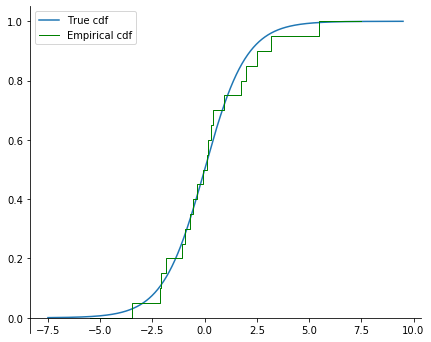

In [13]:
# nbi:hide_in
# Compute the empirical cdf and compare against the true cdf

# plot setup
plt.figure(figsize=(7,6)) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data',0))

def cdf_func(xdata):
    val = np.divide(np.exp(xdata), 1+np.exp(xdata))
    return val

def ecdf(xdata):
    erange_x, counts = np.unique(xdata, return_counts=True)
    cdf_emp = np.cumsum(counts)/xdata.size
    return cdf_emp, erange_x

# add padding 
def padding(cdf_values, range_x):
    edge = (range_x[0]-2, range_x[-1]+2)
    range_x_padded = np.pad(range_x, (1,1), 'constant', constant_values=edge)
    cdf_values_padded = np.pad(cdf_values, (1,1), 'constant', constant_values=(0, 1))
    return cdf_values_padded, range_x_padded

# sort the data
xdata = np.sort(xdata)

# compute empirical cdf
ecdf_values, erange_x = ecdf(xdata)
ecdf_values_padded, erange_x_padded = padding(ecdf_values, erange_x)

# the true cdf
N=100
delta = 1/N
xval = np.linspace(np.min(xdata)-4, np.max(xdata)+4, 1000)
    
# plot
plt.plot(xval, cdf_func(xval), label ='True cdf')
plt.step(erange_x_padded, ecdf_values_padded, where='post', 
         color="green", linewidth=1, label='Empirical cdf')
plt.legend()
plt.show();

